In [1]:
import numpy as np
import pandas
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from scipy import ndimage
from skimage import measure

In [2]:
dataf = pandas.read_csv(r'letter-recognition-new.csv')

In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   letter  312 non-null    object 
 1   xbox    312 non-null    float64
 2   ybox    312 non-null    float64
 3   width   312 non-null    int64  
 4   height  312 non-null    int64  
 5   onpix   312 non-null    int64  
 6   xbar    312 non-null    float64
 7   ybar    312 non-null    float64
 8   x2bar   312 non-null    float64
 9   y2bar   312 non-null    float64
 10  xybar   312 non-null    float64
 11  x2ybar  312 non-null    float64
 12  xy2bar  312 non-null    float64
 13  xedge   312 non-null    float64
 14  xedgey  312 non-null    int64  
 15  yedge   312 non-null    float64
 16  yedgex  312 non-null    int64  
dtypes: float64(11), int64(5), object(1)
memory usage: 41.6+ KB


In [4]:
dataf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,18.413462,19.591346,19.679487,26.253205,193.605769,-0.035831,-0.009866,41.759120,70.332981,0.824966,-28.157749,-30.171622,5.135769,1758.907051,2.793711,1511.073718
std,2.060705,0.740745,5.834797,3.168878,67.417224,0.088820,0.056296,22.740101,20.750750,5.623183,111.185928,91.430110,4.960151,349.718565,0.507740,262.120142
min,10.500000,17.000000,1.000000,20.000000,42.000000,-0.307217,-0.216049,0.250000,30.207143,-20.472930,-377.935115,-335.717437,2.958333,1261.000000,1.482759,861.000000
25%,17.500000,19.000000,16.000000,24.750000,148.000000,-0.088521,-0.024156,25.612239,55.713131,-0.475567,-67.712967,-77.368209,3.803686,1482.250000,2.400000,1305.250000
50%,18.500000,19.500000,20.000000,27.000000,185.500000,-0.009032,0.000000,38.051815,68.040616,0.379570,0.000000,-8.616186,4.312500,1721.000000,2.785441,1504.500000
75%,20.000000,20.000000,23.000000,29.000000,241.250000,0.003399,0.012195,58.258916,83.478163,3.707775,19.958819,9.013127,5.000000,1905.000000,3.186508,1702.000000
max,24.500000,22.000000,37.000000,36.000000,370.000000,0.316817,0.160000,111.047904,126.441083,18.653125,338.572917,244.151235,61.000000,3281.000000,4.045455,2143.000000


In [5]:
y = dataf.pop('letter')

In [6]:
def norm(df):
    norm_df = df.copy()
    columns_to_normalize = df.columns

    for column in columns_to_normalize:
        min_val = norm_df[column].min()
        max_val = norm_df[column].max()
    
        norm_df[column] = (norm_df[column] - min_val) / (max_val - min_val)
    return norm_df

In [7]:
dataf_norm = norm(dataf)

<function matplotlib.pyplot.show(close=None, block=None)>

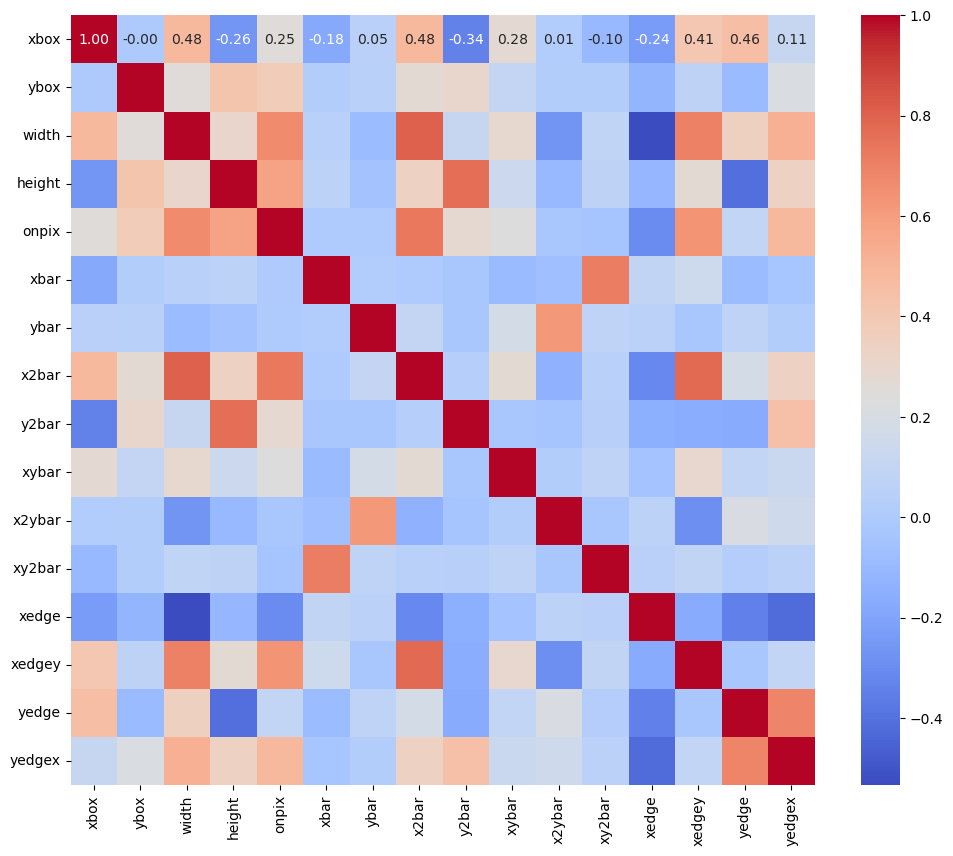

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(dataf_norm.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show

In [9]:
x_train,x_test,y_train,y_test=train_test_split(dataf_norm,y,test_size=0.2)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
#looking for optimal k
best_k = 1
for k in range(2, 10):
    test_knn = KNeighborsClassifier(k)
    best_knn = KNeighborsClassifier(best_k)
    
    test_knn.fit(x_train, y_train)
    best_knn.fit(x_train, y_train)
    
    if test_knn.score(x_test, y_test) > best_knn.score(x_test, y_test):
        best_k = k
        
print(best_k)

4


In [11]:
from sklearn.neighbors import KNeighborsClassifier


knn_lib=KNeighborsClassifier(best_k)
knn_lib.fit(x_train, y_train)
knn_lib.score(x_test, y_test)

0.6666666666666666